# Stanford CME 241 (Winter 2026) - Assignment 3

**Due: Friday, February 27 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/my-username/my-repo/assignment-file-name.ipynb

*Group members (replace below names with people in your group):* 
- Jeffrey Xue
- Jack Zhang
- Patrick Flanagan

## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from typing import Iterable, Iterator, Mapping, TypeVar, Callable, Sequence, Tuple, Dict
from rl.distribution import Categorical
from rl.markov_process import FiniteMarkovRewardProcess
from rl.chapter10.prediction_utils import compare_td_and_mc
X = TypeVar('X')
S = TypeVar('S')

## Question 1: Milk Vendor Optimization Problem (Led by Jack Zhang)

You are a milk vendor and your task is to bring to your store a supply (denoted $S \in \mathbb{R}$) of milk volume in the morning that will give you the best profits. You know that the demand for milk throughout the course of the day is a probability distribution function $f$ (for mathematical convenience, assume people can buy milk in volumes that are real numbers, hence milk demand $x \in \mathbb{R}$ is a continuous variable with a probability density function). 

For every extra gallon of milk you carry at the end of the day (supply $S$ exceeds random demand $x$), you incur a cost of $h$ (effectively the wasteful purchases amounting to the difference between your purchase price and the end-of-day discount disposal price since you are not allowed to sell the same milk the next day). For every gallon of milk that a customer demands that you don’t carry (random demand $x$ exceeds supply $S$), you incur a cost of $p$ (effectively the missed sales revenue amounting to the difference between your sales price and purchase price). 

Your task is to identify the optimal supply $S$ that minimizes your **Expected Cost** $g(S)$, given by:

$$
g_1(S) = \mathbb{E}[\max(x - S, 0)] = \int_{S}^{\infty} (x - S) \cdot f(x) \, dx
$$

$$
g_2(S) = \mathbb{E}[\max(S - x, 0)] = \int_{-\infty}^{S} (S - x) \cdot f(x) \, dx
$$

$$
g(S) = p \cdot g_1(S) + h \cdot g_2(S)
$$

---

### Part (A): Analytical Optimization

1. **Derive the first-order condition (FOC)** for minimizing the expected cost $g(S)$.
2. **Solve the FOC** to express the optimal supply $S^*$ in terms of the given parameters: $p$, $h$, and the demand distribution $f(x)$. (*Hint*: Pay attention to the balance between the costs of overstocking and understocking)

3. **Interpretation**: Provide an interpretation of the condition you derived. What does the balance between $p$ and $h$ imply about the optimal supply $S^*$?

---

### Part (B): Special Case Analysis

1. Consider the case where the demand $x$ follows an **exponential distribution** with parameter $\lambda > 0$. That is, $f(x) = \lambda e^{-\lambda x}$ for $x \geq 0$.
    - Derive an explicit expression for the optimal supply $S^*$.
    
2. Consider the case where the demand $x$ follows a **normal distribution** with mean $\mu$ and variance $\sigma^2$, i.e., $x \sim \mathcal{N}(\mu, \sigma^2)$. 
    - Set up the integral for $g(S)$ and describe how it relates to the **cumulative distribution function (CDF)** of the normal distribution.
    - Provide an interpretation of how changes in $\mu$ and $\sigma$ influence the optimal $S^*$. 

---

### Part (C): Framing as a Financial Options Problem

1. Frame the milk vendor’s problem as a **portfolio of call and put options**:
    - Identify the analog of the “strike price” and “underlying asset.”
    - Explain which part of the cost function $g_1(S)$ or $g_2(S)$ corresponds to a call option and which part to a put option.
    - What do $p$ and $h$ represent in this options framework?

2. Explain how this framing could be used to derive the optimal supply $S^*$ if solved using financial engineering concepts.

---

### Part (D): Numerical Solution and Simulation

1. **Numerical Solution**: Write a Python function that numerically estimates the optimal $S^*$ using an iterative search or numerical optimization method. 

2. **Simulation**: Generate random samples of milk demand from an exponential distribution and simulate the total costs for different values of $S$. Plot the costs against $S$ and visually identify the optimal $S$.

### Part (A) Answer

**1.**

Writing out the expected cost:

$$g(S) = p \int_S^\infty (x - S) f(x)\,dx + h \int_{-\infty}^S (S - x) f(x)\,dx$$

Lets define $F$ to be the CDF of the demand distribution.

Differentiating with respect to $S$ to find FOC:

$$g_1'(S) = \frac{d}{dS}\int_S^\infty (x-S)f(x)\,dx = -(S-S)f(S) + \int_S^\infty (-1)f(x)\,dx = -(1 - F(S))$$

$$g_2'(S) = (S-S)f(S) + \int_{-\infty}^S (1)f(x)\,dx = F(S)$$

Putting those results together and set to 0:

$$g'(S) = -p\,(1 - F(S)) + h\,F(S)=0$$

$$-p + pF(S) + hF(S) = 0$$

$$F(S)(p + h) = p$$

$$F(S) = \frac{p}{p + h},$$

which is the FOC.

**2.**

Solving the FOC for $S^*$ is simple:

$$S^* = F^{-1}\!\left(\frac{p}{p+h}\right),$$

where $F$ is still the CDF of the demand distribution.

**3. Interpretation**

The optimal supply is a ratio between $p$ the understock cost and $h$ the overstock cost. Specifically, it's the percentage of understock to total cost (understock + overstock). 

When understock is much more expensive than overstock, meaning $p \gg h$, the ratio goes $1$. This means the vendor should stock as much milk as possible since the cost of understock dominates the cost of overstock. On the other hand, when overstock is much more expensive, $h \gg p$, $S^*$ goes to $0$, meaning the vendor stocks very little to avoid waste.

When $p = h$, $S^*=0.5$, meaning the optimal supply is the median of the demand distribution.

### Part (B) Answer

**1.:** $f(x) = \lambda e^{-\lambda x}$ for $x \geq 0$, with CDF $F(x) = 1 - e^{-\lambda x}$.

Applying the FOC $F(S^*) = \frac{p}{p+h}$:

$$1 - e^{-\lambda S^*} = \frac{p}{p+h}$$

$$e^{-\lambda S^*} = \frac{h}{p+h}$$

$$S^* = \frac{1}{\lambda}\ln\!\left(\frac{p+h}{h}\right)$$

**2.:** $x \sim \mathcal{N}(\mu, \sigma^2)$, with CDF $F(x) = \Phi\!\left(\frac{x - \mu}{\sigma}\right)$.

$$g(S) = p \int_S^\infty (x - S)\,\frac{1}{\sigma\sqrt{2\pi}}\exp\!\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)dx \;+\; h \int_{-\infty}^S (S - x)\,\frac{1}{\sigma\sqrt{2\pi}}\exp\!\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)dx$$

Let's define some variables to make the expression nicer. Let $z = \frac{S - \mu}{\sigma}$ and $\phi(z) = \frac{1}{\sqrt{2\pi}}e^{-z^2/2}$.

$$g_1(S) = (\mu - S)(1 - \Phi(z)) + \sigma\,\phi(z)$$

$$g_2(S) = (S - \mu)\,\Phi(z) + \sigma\,\phi(z)$$

Apply the FOC $F(S^*) = \frac{p}{p+h}$.

$$\Phi\!\left(\frac{S^* - \mu}{\sigma}\right) = \frac{p}{p+h}$$

$$S^* = \mu + \sigma\,\Phi^{-1}\!\left(\frac{p}{p+h}\right)$$


Interpretation:

Mean $\mu$: Supply scales linearly with mean. If $\mu$ goes up $S^*$ goes up by the same amount. Higher expected demand requires just as much more supply.

Variance $\sigma^2$: Depends on the sign of $\Phi^{-1}\!\left(\frac{p}{p+h}\right)$. 

If $p > h$ (understocking is more expensive), then $\frac{p}{p+h} > 0.5$, so $\Phi^{-1} > 0$, and increasing $\sigma$ raises $S^*$. This means more uncertainty warrants a larger safety stock since we want to avoid understocking.

On the other hand, if $p < h$ (overstocking is more expensive), then $\frac{p}{p+h} < 0.5$, so $\Phi^{-1} < 0$, and increasing $\sigma$ **lowers** $S^*$ This means more uncertainty warrants a smaller safety stock since we want to avoid overstockign.

If $p = h$, then $\Phi^{-1}(0.5) = 0$ and $S^* = \mu$ independent of $\sigma$. We don't need to consider uncertainty because understocking and overstocking risks are the same.

### Part (C) Answer

**1.**

The random demand $x$ is the underlying asset price at expiry, and the supply level $S$ plays is the strike price.

The understocking cost $g_1(S) = \mathbb{E}[\max(x - S, 0)]$ has the same form as the expected payoff of a call option with strike $S$ on underlying $x$. The overstocking cost $g_2(S) = \mathbb{E}[\max(S - x, 0)]$ has the same form of the expected payoff of a put option.

The per-unit costs $p$ and $h$ are the number of contracts on the call and put. The total expected cost is then the value of a portfolio of $p$ calls and $h$ puts, all with strike $S$:

$$g(S) = p \cdot \text{Call}(S) + h \cdot \text{Put}(S)$$

**2.**

We can use put-call parity $\text{Call}(S) - \text{Put}(S) = \mathbb{E}[x] - S$

to write

$$g(S) = p\,\text{Call}(S) + h\,\text{Put}(S) = p\,\text{Call}(S) + h\,(\text{Call}(S) - \mathbb{E}[x] + S)$$
$$= (p+h)\,\text{Call}(S) + h(S - \mathbb{E}[x])$$

We can take the derivative and use the option delta $\frac{d}{dS}\text{Call}(S) = -(1-F(S))$.

$$g'(S) = -(p+h)(1-F(S)) + h = 0 $$
$$F(S^*) = \frac{p}{p+h}$$

In other words, the optimal strike is chosen so that the probability of the option finishing ITM (in the money) equals the ratio of contracts. 

### Part (D) Answer

In [2]:
from scipy import integrate
import numpy as np

# simulation parameters
p = 5  # understock cost 
h = 2  # overstock cost 
lambda_param = 1.0  # for exponential distribution

def demand_pdf(x):
    return lambda_param * np.exp(-lambda_param * x) if x >= 0 else 0.0

def demand_cdf(x):
    return 1 - np.exp(-lambda_param * x) if x >= 0 else 0.0

def expected_cost(S):
    # g1(S): expected understock cost
    g1, _ = integrate.quad(lambda x: (x - S) * demand_pdf(x), S, np.inf)
    # g2(S): expected overstock cost
    g2, _ = integrate.quad(lambda x: (S - x) * demand_pdf(x), 0, S)
    return p * g1 + h * g2

# analytical solution
analytical_S_star = (1 / lambda_param) * np.log((p + h) / h)
print(f"Analytical S* = {analytical_S_star:.4f}")

Analytical S* = 1.2528


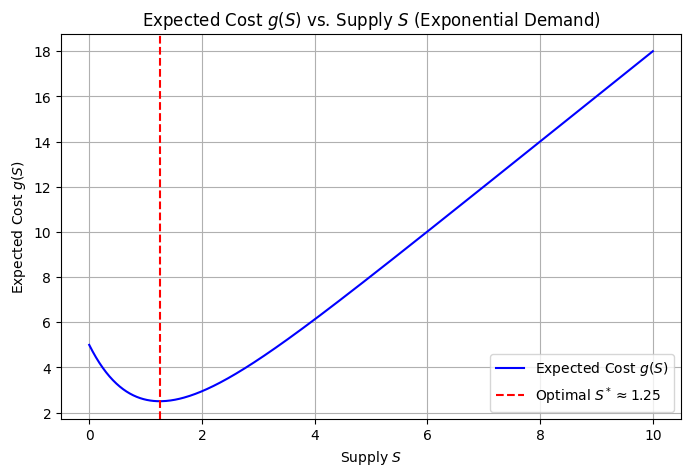

np.float64(1.252763051168189)

In [5]:
result = minimize_scalar(expected_cost, bounds=(0, 10), method='bounded')
optimal_S = result.x

# Simulation of costs
S_values = np.linspace(0, 10, 500)
costs = [expected_cost(S) for S in S_values]

# Plotting the costs against S
plt.figure(figsize=(8, 5))
plt.plot(S_values, costs, label="Expected Cost $g(S)$", color='blue')
plt.axvline(optimal_S, color='red', linestyle='--', label=f"Optimal $S^* \\approx {optimal_S:.2f}$")
plt.xlabel("Supply $S$")
plt.ylabel("Expected Cost $g(S)$")
plt.title("Expected Cost $g(S)$ vs. Supply $S$ (Exponential Demand)")
plt.legend()
plt.grid(True)
plt.show()

optimal_S

## Question 2: Car Sales (Led By: Jeffrey Xue)

You must sell your car within a finite window of $N$ days. At the beginning of each day $t \in \{1, \dots, N\}$, you receive a single offer $X_t$ from a dealership, where $\{X_t\}$ are i.i.d. draws from a known continuous distribution $Q$ supported on $[m, M]$, with $0 < m < M$.

After observing $X_t$, you must immediately choose whether to **accept** or **reject** the offer:

- If you **accept** on day $t$, you sell the car immediately and receive payoff $X_t$. The process then terminates.
- If you **reject** on day $t < N$, you keep the car, pay a parking cost $c \ge 0$ at the end of that day, and proceed to day $t+1$.
- On day $N$, you must accept the offer (i.e., rejecting is not allowed).

Your objective is to maximize the expected **net payoff**, defined as the sale price minus the total parking costs paid before the sale.

---

### Part (A): MDP Modeling

Model this problem as a finite-horizon **Markov Decision Process (MDP)**. Clearly specify:

1. **States**
2. **Actions**
3. **Rewards**
4. **State-transition probabilities**
5. **Discount factor** (use $\gamma = 1$)

Also state whether this MDP is finite- or infinite-horizon, episodic or continuing, and whether it is time-homogeneous.

---

### Part (B): Structure of the Optimal Policy

Let $V_t$ denote the optimal value function when there are $t$ days remaining (before observing the offer).

1. Write down the Bellman recursion for $V_t$.
2. Show that the optimal policy is a **time-dependent threshold policy**: that is, there exists a reservation price $r_t$ such that it is optimal to accept an offer $x$ if and only if $x \ge r_t$.
3. Express the threshold $r_t$ in terms of $V_{t-1}$ and $c$.

(You may leave expectations with respect to $Q$ written in integral or expectation form. A closed-form solution for general $Q$ is not required.)

---

### Part (C): Special Case (No Integrals)

Now consider the special case where $c = 0$ and $Q = \text{Uniform}[m, M]$.

1. Write the recursion for $V_t$ explicitly.
2. Provide the optimal policy in as closed-form a way as possible. Your policy may depend on recursively defined coefficients, but your final expressions should contain **no integrals**.


### Part (A) Answer

1. **States**
Each decision point is $(t, x)$ where $t \in \{1, \dots, N\}$ is the current day and $x \in [m, M]$ is the offer received that day. Any state where $t = N$ or the car is sold results in termination which we can represent as the absorbing state $\textsf{Sold}$.

2. **Actions**
For $t < N$: the action space is $\{\text{Accept}, \text{Reject}\}$.
For $t = N$: the action space is just $\{\text{Accept}\}$ (i.e. must accept).

3. **Rewards**
If the action chosen is $\text{Accept}$ at state $(t, x)$, the reward $= x$.
If the action chosen is $\text{Reject}$ at state $(t, x)$ (in which case it must be true that $t < N$), the reward $= -c$.

4. **State-transition probabilities**
Any state that choses the action $\text{Accept}$ will transition to the terminal state $\textsf{Sold}$ deterministically. 
Otherwise, state $(t, x)$ transitions to $(t+1, X_{t+1})$ where $X_{t+1} \sim Q$ independently.

5. **Discount factor** (use $\gamma = 1$)

The MDP is also finite-horizon with at most $N$ steps, episodic since every trajectory ends when the car is sold, and time-inhomogeneous because the action set and the number of remaining days depend on $t$.

### Part (B) Answer
1. Bellman base case ($t = 1$): we have to accept, so the value is just the expectation of the offer. Bellman recursive case ($t \geq 2$): we should reject the offer if the value of waiting for tomorrow's offer (including parking cost) is greater. Thus, we take the max of $X$ and $V_{t-1} - c$, so the value today is the expectation of this max.
$$V_1 = \mathbb{E}_Q[X]$$
$$V_t = \mathbb{E}_Q\!\Big[\max\!\big(X,\; V_{t-1} - c\big)\Big]$$

2. Following the logic above, given the offer $x$ on a day with $t$ remaining days, the agent accepts iff $x \;\geq\; V_{t-1} - c$. Thus, the reservation price is $r_t = V_{t-1} - c$. Both $V_{t-1}$ and $c$ are independent of $x$, so this is a valid reservation price to accept an offer $x$ if and only if $x \ge r_t.$ Thus, this a time-dependent threshold policy.

3. As explained above, $r_t = V_{t-1} - c$.


### Part (C) Answer

1. As outlined in part (B), the base case is $V_1 = \mathbb{E}[X] = \frac{m + M}{2}$ and the recursive case is 
$$V_t = \mathbb{E}_Q\!\Big[\max\!\big(X,\; V_{t-1} - c\big)\Big] = \mathbb{E}_Q\!\Big[\max\!\big(X,\; V_{t-1}\big)\Big] = V_{t-1}\cdot\frac{V_{t-1}-m}{M-m} + \int_{V_{t-1}}^{M} x \cdot \frac{1}{M-m}\,dx.$$
$$= V_{t-1}\cdot\frac{V_{t-1}-m}{M-m} \;+\; \frac{M^2 - V_{t-1}^2}{2(M-m)}  = \frac{V_{t-1}^2 - 2m\,V_{t-1} + M^2}{2(M-m)}.$$

2. We can express the optimal policy in terms of the reservation price, as the policy is just to accept an offer $x$ if and only if $x \ge r_t.$ From our answer in part (B), we have $r_1 = m$ because we must accept on the last day, and $r_t = V_{t-1} - c = V_{t-1}$ for  $t \geq 2.$ Therefore, once we solve for  $\{V_1, V_2, \ldots, V_N\}$, we can get all our $r_t$ values which give us the optimal policy.

## Question 3: Constrained Consumption (Led By: Jeffrey Xue)

Consider the following discrete-time MDP for constrained consumption. At $t = 0$, the agent is given a finite amount $x_0 \in \mathbb{R}^+$ of a resource. In each time period, the agent can choose to consume any amount of the resource, with the consumption denoted as $c \in [0, x]$ where $x$ is the amount of the resource remaining at the start of the time period. This consumption results in a reduction of the resource at the start of the next time period:  
$$x' = x - c.$$  

Consuming a quantity $c$ of the resource provides a utility of consumption equal to $U(c)$, and we adopt the **CRRA utility function**:  
$$
U(c) = \frac{c^{1 - \gamma}}{1 - \gamma}, \quad (\gamma > 0, \gamma \neq 1)
$$

Our goal is to maximize the aggregate discounted utility of consumption until the resource is completely consumed. We assume a discount factor of $\beta \in (0, 1)$ when discounting the utility of consumption over any single time period. Assume parameters are such that the value function is finite.

We model this as a **discrete-time, continuous-state-space, continuous-action-space, stationary, deterministic MDP**, and so our goal is to solve for the **Optimal Value Function** and associated **Optimal Policy**, which will give us the optimal consumption trajectory of the resource. Since this is a stationary MDP, the **State** is simply the amount $x$ of the resource remaining at the start of a time period. The **Action** is the consumption quantity $c$ in that time period. The **Reward** for a time period is $U(c)$ when the consumption in that time period is $c$. The discount factor over each single time period is $\beta$.

We assume that the **Optimal Policy** is given by:  
$$
c^* = \theta^* \cdot x \quad \text{for some } \theta^* \in [0, 1].
$$

---

### Part (A): Closed-form Expression for $V_\theta(x)$

Our first step is to consider a fixed deterministic policy, given by:  
$$c = \theta \cdot x \quad \text{for some fixed } \theta \in [0, 1].$$  
Derive a closed-form expression for the **Value Function** $V_\theta(x)$ for a fixed deterministic policy, given by $c = \theta \cdot x$. Specifically, you need to express $V_\theta(x)$ in terms of $\beta$, $\gamma$, $\theta$, and $x$.

---

### Part (B): Solving for $\theta^*$

Use this closed-form expression for $V_\theta(x)$ to solve for the $\theta^*$ which maximizes $V_\theta(x)$ (thus fetching us the **Optimal Policy** given by $c^* = \theta^* \cdot x$).

---

### Part (C): Expression for $V^*(x)$

Use this expression for $\theta^*$ to obtain an expression for the **Optimal Value Function** $V^*(x)$ in terms of only $\beta$, $\gamma$, and $x$.

---

### Part (D): Validation of the Bellman Equation

Validate that the **Optimal Policy** (derived in part B) and **Optimal Value Function** (derived in part C) satisfy the **Bellman Optimality Equation**.

### Part (A) Answer
With this policy, we have $x' = x - c = x - \theta x = (1 - \theta) x,$ so the state evolves deterministically with $x_t = (1-\theta)^t x.$

The consumption will be $c_t = \theta \cdot x_t = \theta(1-\theta)^t x$, which gets utility

$$U(c_t) = \frac{(\theta(1-\theta)^t x)^{1-\gamma}}{1-\gamma} = \frac{\theta^{1-\gamma}(1-\theta)^{t(1-\gamma)} x^{1-\gamma}}{1-\gamma}.$$

Summing the discounted utilities gets

$$V_\theta(x) = \sum_{t=0}^{\infty} \beta^t U(c_t) = \frac{\theta^{1-\gamma}\, x^{1-\gamma}}{1-\gamma} \sum_{t=0}^{\infty} \big(\beta(1-\theta)^{1-\gamma}\big)^t.$$
$$= \frac{\theta^{1-\gamma}x^{1-\gamma}}{1-\gamma} \cdot \frac{1}{1 - \beta(1-\theta)^{1-\gamma}}.$$
assuming geometric series convergence with $\beta(1-\theta)^{1-\gamma} < 1$.

### Part (B) Answer

Since $V_\theta(x) = \frac{x^{1-\gamma}}{1-\gamma} \cdot \frac{\theta^{1-\gamma}}{1 - \beta(1-\theta)^{1-\gamma}}$ and $\frac{x^{1-\gamma}}{1-\gamma}$ is a constant in $\theta$, we maximize $V_\theta(x)$ by optimizing over $g(\theta) = \frac{\theta^{1-\gamma}}{1 - \beta(1-\theta)^{1-\gamma}}$.

This gets:
$$g'(\theta) = 0$$
$$\frac{(1-\gamma)\theta^{-\gamma}\big[1 - \beta(1-\theta)^{1-\gamma}\big] - \theta^{1-\gamma}\cdot\beta(1-\gamma)(1-\theta)^{-\gamma}}{(1 - \beta(1-\theta)^{1-\gamma})^2} = 0$$
$$(1-\gamma)\theta^{-\gamma}\big[1 - \beta(1-\theta)^{1-\gamma}\big] - \theta^{1-\gamma}\cdot\beta(1-\gamma)(1-\theta)^{-\gamma} = 0$$
$$\theta^{-\gamma}\big[1 - \beta(1-\theta)^{1-\gamma}\big] = \beta\,\theta^{1-\gamma}(1-\theta)^{-\gamma}$$
$$\theta^{-\gamma} = \theta^{-\gamma}\beta(1-\theta)^{1-\gamma} + \beta\,\theta^{1-\gamma}(1-\theta)^{-\gamma}$$
$$\theta^{-\gamma} = \beta\Big[\theta^{-\gamma}(1-\theta)^{1-\gamma} + \theta^{1-\gamma}(1-\theta)^{-\gamma}\Big]$$
$$\theta^{-\gamma} = \beta\big[\theta(1-\theta)\big]^{-\gamma}\big[(1-\theta)+\theta\big]$$
$$\theta^{-\gamma} = \beta\big[\theta(1-\theta)\big]^{-\gamma}$$
$$1 = \beta(1-\theta)^{-\gamma}$$
$$(1-\theta)^\gamma = \beta$$
Solving gets the optimal policy $\theta^* = 1 - \beta^{1/\gamma}.$

### Part (C) Answer

Substituting $\theta^* = 1 - \beta^{1/\gamma}$ into the answer in part (A):
$$V^*(x) = V_{\theta^*}(x)$$
$$= \frac{(\theta^*)^{1-\gamma}x^{1-\gamma}}{1-\gamma } \cdot \frac{1}{1 - \beta(1-\theta^*)^{1-\gamma}}$$
$$ = \frac{(1 - \beta^{1/\gamma})^{1-\gamma}x^{1-\gamma}}{1-\gamma } \cdot \frac{1}{1 - \beta(1-(1 - \beta^{1/\gamma}))^{1-\gamma}}$$
$$ = \frac{(1 - \beta^{1/\gamma})^{1-\gamma}x^{1-\gamma}}{1-\gamma } \cdot \frac{1}{1 - \beta^{1/\gamma}}$$
$$ = \frac{(1 - \beta^{1/\gamma})^{-\gamma}}{1-\gamma}\, x^{1-\gamma}.$$

### Part (D) Answer

First, let $K = (1 - \beta^{1/\gamma})^{-\gamma}$ so that $V^*(x) = \frac{K\, x^{1-\gamma}}{1-\gamma}$. We want to show $V^*(x)$ and $c^* = \theta^* x$ satisfy the Bellman Optimality Equation:
$$V^*(x) = \max\{U(c) + \beta\, V^*(x - c)\} = \max\{\frac{c^{1-\gamma}}{1-\gamma} + \frac{\beta K\,(x-c)^{1-\gamma}}{1-\gamma}\}$$

Taking a derivative and setting to 0 gets 
$$c^{-\gamma} - \beta K\,(x-c)^{-\gamma} = 0$$
$$c^{-\gamma} = \beta K\,(x-c)^{-\gamma}$$
$$\left(\frac{x-c}{c}\right)^\gamma = \beta K$$
$$\frac{x-c}{c} = (\beta K)^{1/\gamma}$$
$$\frac{x}{c} - 1 = (\beta (1 - \beta^{1/\gamma})^{-\gamma})^{1/\gamma}$$
$$\frac{x}{c} - 1 = \frac{\beta^{1/\gamma}}{1 - \beta^{1/\gamma}}$$
$$\frac{x}{c} = 1 + \frac{\beta^{1/\gamma}}{1-\beta^{1/\gamma}} $$
$$\frac{x}{c} = \frac{1}{1-\beta^{1/\gamma}}$$
$$\frac{x}{c} = \frac{1}{\theta^*} $$
$$c = \theta^* x$$

This confirms the optimal policy from part (B).

Now, going back to $V^*(x) = \max\{\frac{c^{1-\gamma}}{1-\gamma} + \frac{\beta K\,(x-c)^{1-\gamma}}{1-\gamma}\}$, substituting $c^* = \theta^* x$ into the objective gets:
$$\frac{(\theta^* x)^{1-\gamma}}{1-\gamma} + \frac{\beta K\,((1-\theta^*)x)^{1-\gamma}}{1-\gamma} = \frac{x^{1-\gamma}}{1-\gamma}\Big((\theta^*)^{1-\gamma} + \beta K\,(1-\theta^*)^{1-\gamma}\Big).$$

Since $1-\theta^* = \beta^{1/\gamma}$ and $K = (\theta^*)^{-\gamma}$, we get
$$\frac{x^{1-\gamma}}{1-\gamma}\Big((\theta^*)^{1-\gamma} + \beta K\,(1-\theta^*)^{1-\gamma}\Big)$$
$$= \frac{x^{1-\gamma}}{1-\gamma}\Big((\theta^*)^{1-\gamma} + \beta\,(\theta^*)^{-\gamma}\,\beta^{(1-\gamma)/\gamma}\Big)$$
$$= \frac{x^{1-\gamma}}{1-\gamma}\Big((\theta^*)^{1-\gamma} + \beta^{1/\gamma}(\theta^*)^{-\gamma}\Big)$$
$$= \frac{x^{1-\gamma}}{1-\gamma}\Big((\theta^*)^{-\gamma}\big(\theta^* + \beta^{1/\gamma}\big)\Big)$$
$$= \frac{x^{1-\gamma}}{1-\gamma}\Big((\theta^*)^{-\gamma}\big((1-\beta^{1/\gamma}) + \beta^{1/\gamma}\big)\Big)$$
$$= \frac{x^{1-\gamma}}{1-\gamma}(\theta^*)^{-\gamma}$$
$$= \frac{x^{1-\gamma}}{1-\gamma}((1 - \beta^{1/\gamma}))^{-\gamma}$$
$$= V^*(x)$$

This matches the lefthand side of the Bellman Optimality Equation, so it confirms the optimal value function from part (C).

## Problem 4: Double Q-Learning (Led By: Patrick Flanagan)

It is known that **Q-Learning** can suffer from maximization bias during finite-sample training. In this problem, we consider a modification of tabular Q-Learning called **Double Q-Learning**, which reduces this bias by decoupling action selection and evaluation.

---

### **Algorithm 1: Double Q-Learning**

**Initialize** $Q_1(s,a)$ and $Q_2(s,a)$ for all $s \in \mathcal{S}$, $a \in \mathcal{A}$  
**yield** estimate of $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, set $t = 0$  
&emsp; **while** $s_t$ is non-terminal **do**  

&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy with respect to  
&emsp;&emsp; $\displaystyle \pi(s) = \arg\max_a \big( Q_1(s,a) + Q_2(s,a) \big)$  

&emsp;&emsp; **observe** $(r_t, s_{t+1})$  

&emsp;&emsp; **with probability 0.5 update $Q_1$:**

&emsp;&emsp;&emsp; Let  
&emsp;&emsp;&emsp; $\displaystyle a^* = \arg\max_a Q_1(s_{t+1}, a)$  

&emsp;&emsp;&emsp; Update  
&emsp;&emsp;&emsp; $\displaystyle 
Q_1(s_t, a_t) \leftarrow Q_1(s_t, a_t)
+ \alpha \Big(
r_t + \gamma Q_2(s_{t+1}, a^*)
- Q_1(s_t, a_t)
\Big)
$

&emsp;&emsp; **otherwise update $Q_2$:**

&emsp;&emsp;&emsp; Let  
&emsp;&emsp;&emsp; $\displaystyle a^* = \arg\max_a Q_2(s_{t+1}, a)$  

&emsp;&emsp;&emsp; Update  
&emsp;&emsp;&emsp; $\displaystyle 
Q_2(s_t, a_t) \leftarrow Q_2(s_t, a_t)
+ \alpha \Big(
r_t + \gamma Q_1(s_{t+1}, a^*)
- Q_2(s_t, a_t)
\Big)
$

&emsp;&emsp; $t \leftarrow t + 1$  
&emsp;&emsp; $s_t \leftarrow s_{t+1}$  

**yield** estimate $Q_1 + Q_2$

---

### **Algorithm 2: Q-Learning**

**Initialize** $Q(s,a)$ for all $s \in \mathcal{S}$, $a \in \mathcal{A}$  
**yield** $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, set $t = 0$  
&emsp; **while** $s_t$ is non-terminal **do**  

&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy with respect to  
&emsp;&emsp; $\displaystyle \pi(s) = \arg\max_a Q(s,a)$  

&emsp;&emsp; **observe** $(r_t, s_{t+1})$  

&emsp;&emsp; Update  
&emsp;&emsp; $\displaystyle 
Q(s_t, a_t) \leftarrow Q(s_t, a_t)
+ \alpha \Big(
r_t + \gamma \max_a Q(s_{t+1}, a)
- Q(s_t, a_t)
\Big)
$

&emsp;&emsp; $t \leftarrow t + 1$  
&emsp;&emsp; $s_t \leftarrow s_{t+1}$  

**yield** $Q$

---

### Instructions

The code skeleton for this problem is provided below. Implement the functions:

- `double_q_learning`
- `q_learning`

After running both algorithms, you will obtain a plot of the estimated Q-value versus episode number.

In your writeup:

1. Compare the behavior of Q-Learning and Double Q-Learning.
2. Explain why Q-Learning can exhibit maximization bias.
3. Discuss the advantages and possible drawbacks of Double Q-Learning in general MDPs.


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass
from collections import defaultdict
from typing import Mapping, Iterator, TypeVar, Tuple, Dict, Iterable, Generic

# RL imports (adapt or remove if you don't have the same environment):
from rl.distribution import (
    Distribution, Constant, Gaussian, Choose, SampledDistribution, Categorical
)
from rl.markov_process import NonTerminal, State, Terminal
from rl.markov_decision_process import MarkovDecisionProcess
from rl.td import epsilon_greedy_action

S = TypeVar('S')
A = TypeVar('A')

In [ ]:
# -----------------------------------------------------------------------
# Tabular Q-value function approximation (done for you)
# -----------------------------------------------------------------------
class TabularQValueFunctionApprox(Generic[S, A]):
    """
    A basic implementation of a tabular function approximation 
    with constant learning rate of 0.1
    Also tracks the number of updates per (state, action).
    """
    def __init__(self):
        self.counts: Mapping[Tuple[NonTerminal[S], A], int] = defaultdict(int)
        self.values: Mapping[Tuple[NonTerminal[S], A], float] = defaultdict(float)
    
    def update(self, k: Tuple[NonTerminal[S], A], target: float) -> None:
        alpha = 0.1
        old_val = self.values[k]
        self.values[k] = (1 - alpha) * old_val + alpha * target
        self.counts[k] += 1
    
    def __call__(self, x: Tuple[NonTerminal[S], A]) -> float:
        return self.values[x]

In [ ]:
# -----------------------------------------------------------------------
# Double Q-Learning (fill in)
# -----------------------------------------------------------------------
def double_q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Implements Double Q-Learning as described:
      1) We keep two Q-tables, Q1 and Q2.
      2) We choose actions epsilon-greedily with respect to Q1+Q2.
      3) With 50% chance we update Q1 using next-action chosen by max of Q1,
         evaluated by Q2; otherwise update Q2 symmetrically.
    """
    Q1 = TabularQValueFunctionApprox()
    Q2 = TabularQValueFunctionApprox()
    epsilon = 0.1

    # Wrapper so epsilon_greedy_action selects w.r.t. Q1 + Q2
    # Returns the average so the yield is a proper Q-value estimate
    # (argmax is scale-invariant, so this works for action selection too)
    class CombinedQ:
        def __call__(self, x):
            return (Q1(x) + Q2(x)) / 2

    combined_q = CombinedQ()

    while True:
        s = states.sample()
        while isinstance(s, NonTerminal):
            actions = set(mdp.actions(s))
            a = epsilon_greedy_action(combined_q, s, actions, epsilon)
            s_next, r = mdp.step(s, a).sample()

            if isinstance(s_next, NonTerminal):
                next_actions = list(mdp.actions(s_next))
                if random.random() < 0.5:
                    # Update Q1: select a* with Q1, evaluate with Q2
                    a_star = max(next_actions, key=lambda a_: Q1((s_next, a_)))
                    target = r + gamma * Q2((s_next, a_star))
                    Q1.update((s, a), target)
                else:
                    # Update Q2: select a* with Q2, evaluate with Q1
                    a_star = max(next_actions, key=lambda a_: Q2((s_next, a_)))
                    target = r + gamma * Q1((s_next, a_star))
                    Q2.update((s, a), target)
            else:
                # Terminal state: target is just r
                if random.random() < 0.5:
                    Q1.update((s, a), r)
                else:
                    Q2.update((s, a), r)

            s = s_next

        yield combined_q

In [ ]:
# -----------------------------------------------------------------------
# Standard Q-Learning (fill in)
# -----------------------------------------------------------------------
def q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Standard Q-Learning:
      1) Keep one Q table
      2) Epsilon-greedy wrt that table
      3) Update Q((s,a)) with  r + gamma * max_{a'} Q((s_next, a'))
    """
    Q = TabularQValueFunctionApprox()
    epsilon = 0.1

    while True:
        s = states.sample()
        while isinstance(s, NonTerminal):
            actions = set(mdp.actions(s))
            a = epsilon_greedy_action(Q, s, actions, epsilon)
            s_next, r = mdp.step(s, a).sample()

            if isinstance(s_next, NonTerminal):
                next_actions = list(mdp.actions(s_next))
                max_q = max(Q((s_next, a_)) for a_ in next_actions)
                target = r + gamma * max_q
            else:
                # Terminal state: no future value
                target = r

            Q.update((s, a), target)
            s = s_next

        yield Q

In [ ]:
# -----------------------------------------------------------------------
# The MDP: States A,B and actions a1,a2,b1,...,bn (don't modify anything anymore, just run to get the graphs)
# -----------------------------------------------------------------------
@dataclass(frozen=True)
class P1State:
    """
    The MDP state, storing whether we are in "A" or "B".
    """
    name: str

class P1MDP(MarkovDecisionProcess[P1State, str]):
    
    def __init__(self, n: int):
        self.n = n

    def actions(self, state: NonTerminal[P1State]) -> Iterable[str]:
        """
        Return the actions available from this state.
          - if state is A => ["a1", "a2"]
          - if state is B => ["b1", ..., "bn"]
        """
        if state.state.name == "A":
            return ["a1", "a2"]
        else:
            return [f"b{i}" for i in range(1, self.n+1)]
    
    def step(
        self,
        state: NonTerminal[P1State],
        action: str
    ) -> Distribution[Tuple[State[P1State], float]]:
        """
        Return the distribution of (next state, reward) from (state, action):
          - A + a1 => reward 0, next state B
          - A + a2 => reward 0, next state terminal
          - B + b_i => reward ~ Normal(-0.1,1), next state terminal
        """
        if state.state.name == "A":
            if action == "a1":
                return Constant((NonTerminal(P1State("B")), 0.0))
            else:
                return Constant((Terminal(P1State("T")), 0.0))
        else:
            # For B + b_i => reward ~ N(-0.1,1), then terminal
            def sampler():
                r = np.random.normal(loc=-0.1, scale=1.0)
                return (Terminal(P1State("T")), r)
            return SampledDistribution(sampler)

def run_double_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Runs one 'chain' of Double Q-Learning for 'episodes' episodes,
    returning a list of Q-values for Q((A,a1)) at the end of each episode.
    """
    dq_iter = double_q_learning(mdp, start_dist, gamma)  # generator
    vals = []
    for _ in range(episodes):
        Q1 = next(dq_iter)
        # record Q1((A,a1)) each time
        qA1 = Q1((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def run_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Same but for standard Q-Learning
    """
    q_iter = q_learning(mdp, start_dist, gamma)
    vals = []
    for _ in range(episodes):
        Q = next(q_iter)
        qA1 = Q((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def main():
    # For reproducibility
    random.seed(0)
    np.random.seed(0)

    n = 10
    mdp = P1MDP(n)
    # Always start in A, as a NonTerminal
    start_dist = Constant(NonTerminal(P1State("A")))

    N_RUNS = 100
    N_EPISODES = 400

    all_dbl = []
    all_std = []

    for _ in range(N_RUNS):
        dbl_vals = run_double_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        std_vals = run_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        all_dbl.append(dbl_vals)
        all_std.append(std_vals)

    arr_dbl = np.array(all_dbl)
    arr_std = np.array(all_std)

    avg_dbl = np.mean(arr_dbl, axis=0)
    avg_std = np.mean(arr_std, axis=0)

    plt.figure(figsize=(8,6))
    plt.plot(avg_dbl, label='Double Q-Learning: Q(A,a1)')
    plt.plot(avg_std, label='Q-Learning: Q(A,a1)')
    plt.xlabel('Episode')
    plt.ylabel('Estimated Q-value')
    plt.title('Average Q(A,a1) over 100 runs, n=10')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

### Writeup

#### 1. Comparing the Behavior of Q-Learning and Double Q-Learning

In this MDP, state $A$ offers two actions: $a_1$ (transition to $B$ with reward $0$) and $a_2$ (transition to the terminal state with reward $0$). From state $B$, there are $n = 10$ actions $b_1, \dots, b_{10}$, each producing a reward drawn from $\mathcal{N}(-0.1, 1)$ and transitioning to the terminal state. The true optimal Q-values are $Q^*(A, a_1) = -0.1$ and $Q^*(A, a_2) = 0$, so the optimal policy from $A$ is to choose $a_2$.

The plot reveals a clear divergence in behavior:

- **Q-Learning** significantly overestimates $Q(A, a_1)$ in early episodes, often producing positive estimates despite the true value being $-0.1$. This causes the agent to incorrectly prefer $a_1$ over $a_2$, leading to suboptimal behavior. The overestimation persists for many episodes before the estimate slowly decays toward the true value.

- **Double Q-Learning** produces estimates of $Q(A, a_1)$ that remain much closer to $-0.1$ throughout training. It avoids the initial spike of overestimation and converges more reliably to the correct value.

#### 2. Why Q-Learning Exhibits Maximization Bias

The update target in standard Q-Learning is

$$r + \gamma \max_{a'} Q(s', a').$$

In state $B$, Q-Learning computes $\max_{i} Q(B, b_i)$ over $10$ actions, all of which share the same true Q-value of $-0.1$. Because the rewards are stochastic ($\sigma = 1$), the Q-estimates $Q(B, b_i)$ are noisy. Taking the maximum of these noisy estimates introduces a systematic upward bias:

$$\mathbb{E}\!\Big[\max_i \hat{Q}(B, b_i)\Big] \;>\; \max_i\, Q^*(B, b_i) = -0.1.$$

This follows from Jensen's inequality applied to the convex $\max$ function. With $n = 10$ actions and high-variance returns, the bias is substantial.

The root cause is that Q-Learning uses the **same** Q-table for two coupled purposes: (1) **selecting** the maximizing action via $\arg\max_a Q(s', a)$, and (2) **evaluating** that action's value via $Q(s', a^*)$. The action selected by $\arg\max$ is, by construction, the one with the highest noisy estimate, so its value is systematically inflated. This inflated estimate then propagates backward: the target for $Q(A, a_1)$ incorporates the biased $\max$ from $B$, causing overestimation at $A$ as well.

In our implementation, this manifests directly in the `q_learning` function, where the target is computed as:
```python
max_q = max(Q((s_next, a_)) for a_ in next_actions)
target = r + gamma * max_q
```
The same `Q` table both identifies and scores the best next action, coupling selection and evaluation.

#### 3. Advantages and Drawbacks of Double Q-Learning

**Advantages:**

- **Eliminates maximization bias** by decoupling action selection from value evaluation. When updating $Q_1$, the next action $a^* = \arg\max_a Q_1(s', a)$ is selected using $Q_1$, but its value is evaluated using the independent estimator $Q_2(s', a^*)$. Since $Q_2$'s estimation noise is independent of $Q_1$'s $\arg\max$, the positive correlation that drives overestimation is broken. This is implemented in our `double_q_learning` function:
    ```python
    a_star = max(next_actions, key=lambda a_: Q1((s_next, a_)))
    target = r + gamma * Q2((s_next, a_star))
    ```
- **More accurate value estimates** in environments where many actions share similar true values but have high-variance returns, which is exactly the regime where maximization bias is most severe.
- **Minimal implementation overhead**: the only additions over standard Q-Learning are a second Q-table, a coin flip (`random.random() < 0.5`) to decide which table to update, and a `CombinedQ` wrapper for action selection. The per-step cost is negligible.

**Drawbacks:**

- **Slower convergence per table**: each Q-table only receives updates $50\%$ of the time, so each individual table learns from half the experience. In environments where maximization bias is not a concern (e.g., few actions or low-variance rewards), this slower learning may outweigh the bias-reduction benefit.
- **Doubled memory**: two complete Q-tables must be stored. In the tabular setting this is trivial, but when scaling to function approximation (e.g., Deep Double DQN), this requires maintaining two neural networks, increasing both memory and computation.
- **Potential for mild underestimation**: by using an independent evaluator, Double Q-Learning can occasionally underestimate values. In practice, however, slight underestimation is far less harmful than overestimation, because overestimation drives the agent toward actions it falsely believes are good, compounding errors through feedback loops in the policy.